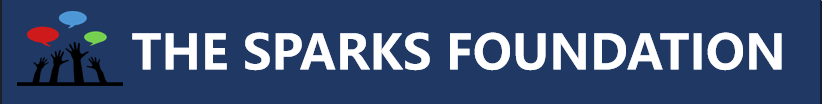 


<hr>

## ***About Dataset***
**This is Task1 of the Data Science and Business Analytics by the Sparks Foundation<br>
1.Predict the percentage of the student based on the number of study Hours.<br>
2.What will be the predicted score if the student studies for 9.25 hours?**

<hr>

## ***Importing Libraries***

In [30]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

<hr>

# ***Read CSV***


In [2]:
path= "C:/Users/scs/Desktop/Mohamed_Raslan/data_scince_track/projects/sparks foundation/task-01/raw.githubusercontent.com_AdiPersonalWorks_Random_master_student_scores - student_scores.csv"
df = pd.read_csv(path)

<hr>

## ***Showing Data***

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<hr>

# ***About Data***


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.shape

(25, 2)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df_corr= df.corr()
df_corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<hr>

## ***Check Missing Values***

In [10]:
np.isnan(df)

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [11]:
np.isnan(df).sum()

Hours     0
Scores    0
dtype: int64

In [12]:
df.duplicated().sum()


0

In [13]:
df['Hours'].nunique()


23

In [14]:
df['Scores'].nunique()


23

<hr>

# ***Data Visualization***


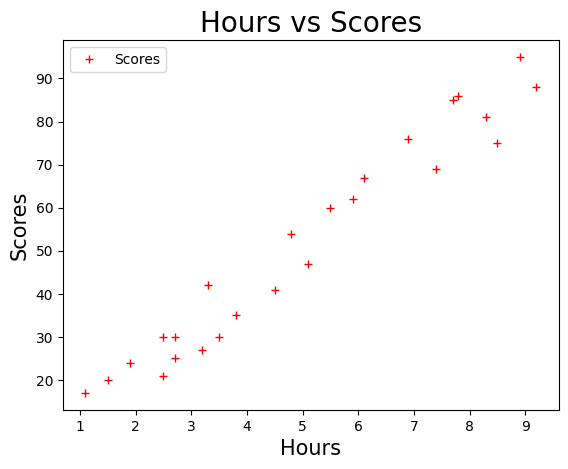

In [15]:
df.plot(x='Hours', y='Scores', style='+', color='r')
plt.title('Hours vs Scores', size=20)
plt.xlabel('Hours',size=15)
plt.ylabel('Scores',size=15)
plt.show()

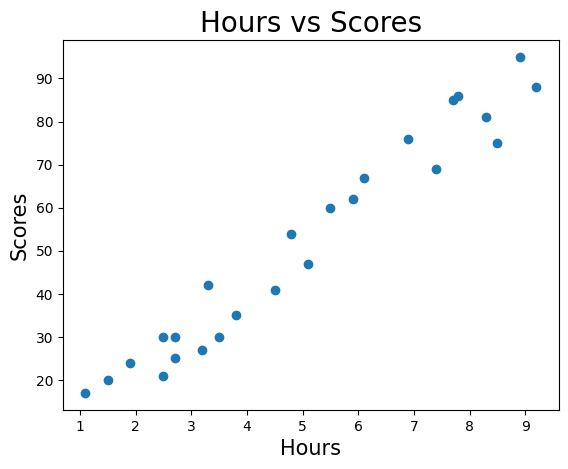

In [16]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Scores', size=20)
plt.xlabel('Hours', size=15)
plt.ylabel('Scores', size=15)
plt.show()


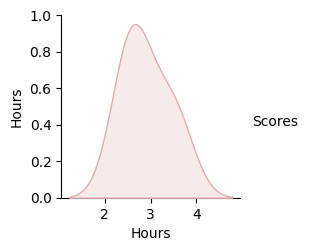

In [17]:
sb.pairplot(df, hue="Scores")
plt.show()

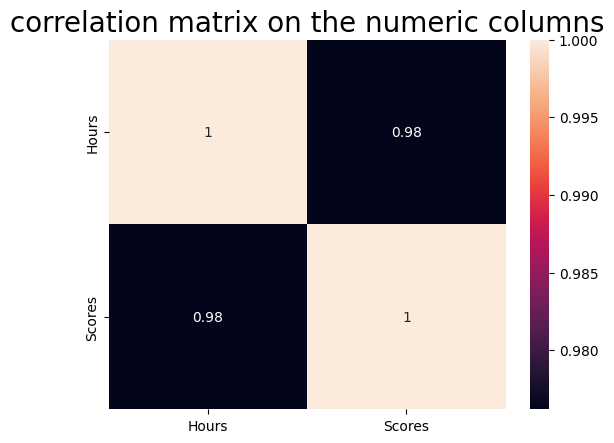

In [18]:
sb.heatmap(df_corr, annot=True)
plt.title('correlation matrix on the numeric columns', size=20)
plt.show()

C:\Users\scs\AppData\Local\Temp\ipykernel_27484\126039348.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(df['Hours'], shade=True, color='b')


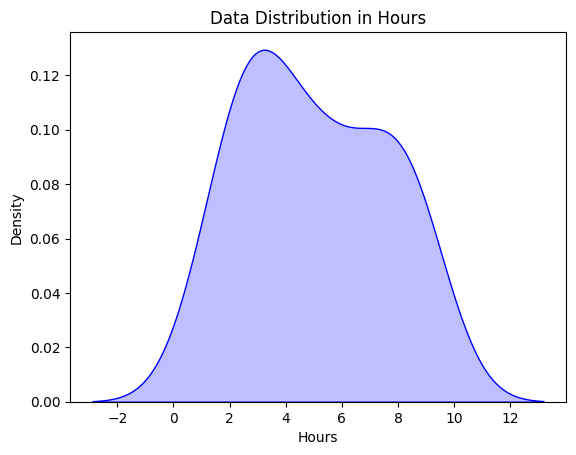

In [19]:
sb.kdeplot(df['Hours'], shade=True, color='b')
plt.title('Data Distribution in Hours')
plt.xlabel('Hours')
plt.ylabel('Density')
plt.show()

C:\Users\scs\AppData\Local\Temp\ipykernel_27484\3249363980.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(df['Scores'], shade=True, color='r')


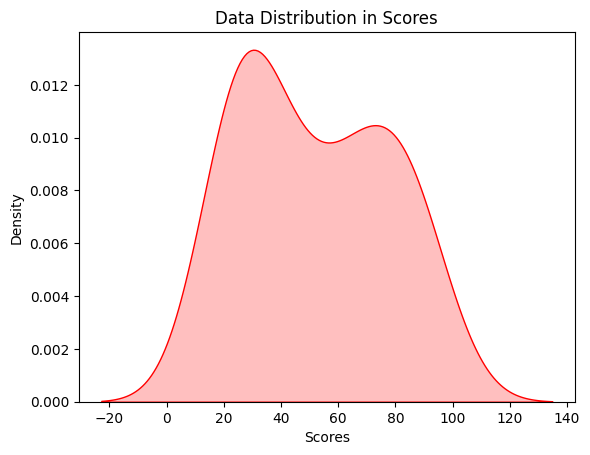

In [20]:
sb.kdeplot(df['Scores'], shade=True, color='r')
plt.title('Data Distribution in Scores')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.show()

Histogram for Columns


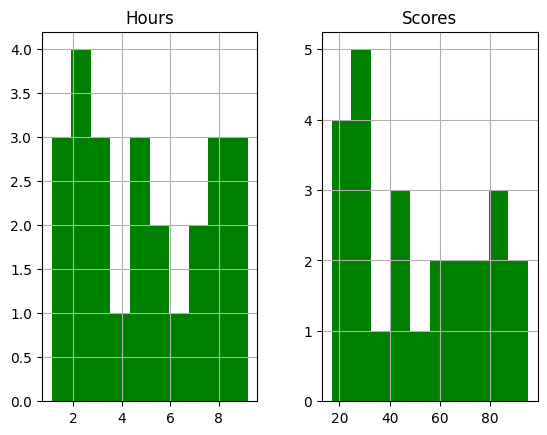

In [21]:
column = df[['Hours', 'Scores']]
print("Histogram for Columns")
column.hist(color='g')
plt.show()

<hr>

# ***Data Modelling***

In [22]:
x= df.iloc[:, :-1].values
y= df.iloc[:, -1].values

In [23]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

<hr>

# ***Spliting Data into (Training & Testing)***


In [24]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)
print('The Train_Set Shape:', x_train.shape)
print('The Test_Set Shape:', x_test.shape)

The Train_Set Shape: (17, 1)
The Test_Set Shape: (8, 1)


<hr>

# ***Train The Model***


In [25]:
model= SGDRegressor(max_iter=1000, eta0=0.01)
model.fit(x_train, y_train)
y_prediction= model.predict(x)
print('Cofficients:', model.coef_)
print('Intercept:', model.intercept_)

Cofficients: [9.72769477]
Intercept: [1.89023947]


<hr>

# ***Model Scatter***


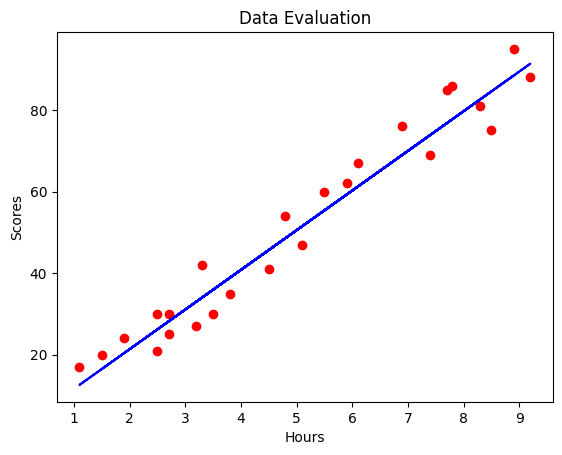

In [26]:
plt.scatter(x, y, color='r')
plt.plot(x,y_prediction, color='b')
plt.title('Data Evaluation')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

<hr>

# ***Prediction***


In [27]:
y_predict= model.predict(x_test)
print(y_predict)

[16.48178162 33.01886273 73.87518077 26.20947639 59.28363861 38.85547959
 20.37285953 77.76625867]


<hr>

# ***comparison Between Scores in Dataset and Prediction***


In [28]:
compare= pd.DataFrame({'Dataset': y_test, 'Prediction': y_predict})
print(compare)

   Dataset  Prediction
0       20   16.481782
1       27   33.018863
2       69   73.875181
3       30   26.209476
4       62   59.283639
5       35   38.855480
6       24   20.372860
7       86   77.766259


<hr>

# **What will be the predicted score if the student studies for 9.25 hours?**

In [29]:
hour= 9.25
prediction= model.predict([[hour]])
print('The Prediction Score for Studying {:.2f} hours: {:.2f}'.format(hour, prediction[0]))

The Prediction Score for Studying 9.25 hours: 91.87


<hr>

<h4>Linkedin: <a>https://www.linkedin.com/in/mohamed-ayman-1ba26220b/</a></h4>
<h4>Githup: <a>https://github.com/mohamedraslan25</a></h4>

<hr>